# Correlations

In [1]:
files <- list.files(pattern = "*.csv", recursive = TRUE)
data <- list()
for(i in 1:length(files)){
    data[[i]] <- read.csv(files[i], stringsAsFactor = FALSE)
}

In [2]:
# install packages
list.of.packages <- c("corrplot")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, quiet = TRUE)

In [3]:
library("corrplot", quietly = TRUE, warn.conflicts = FALSE)

corrplot 0.84 loaded


In [4]:
plot_correlations <- function(dataset, title) {
    res <- cor(subset(dataset, select = -c(Affected,Fold)))
    res <- round(res, 2)
    corrplot(res, method = "circle", title = title, mar=c(0,0,1,0))
}

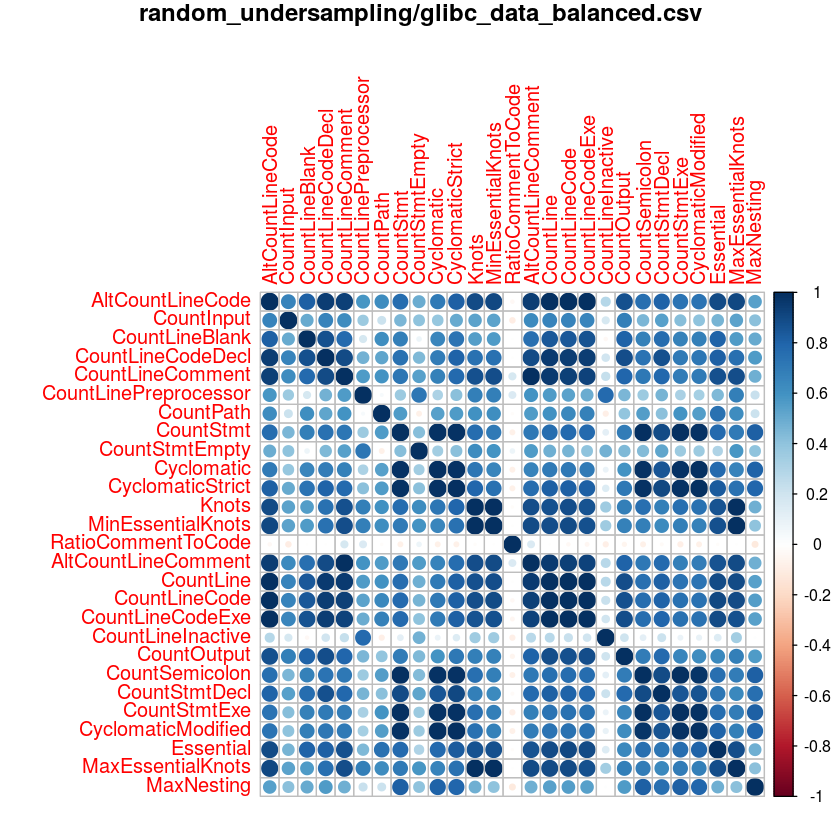

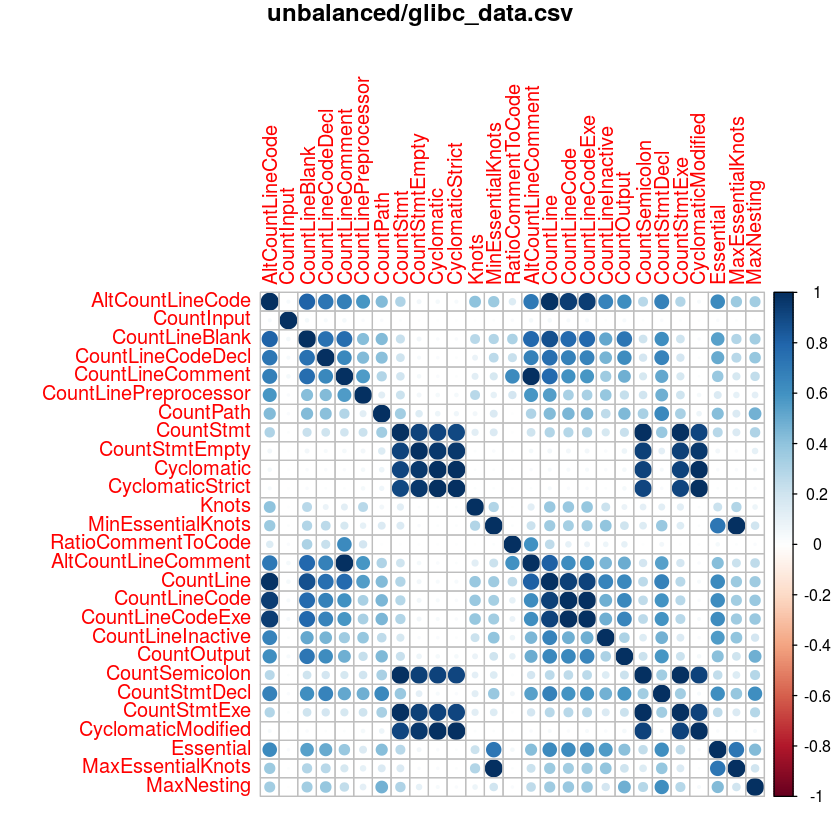

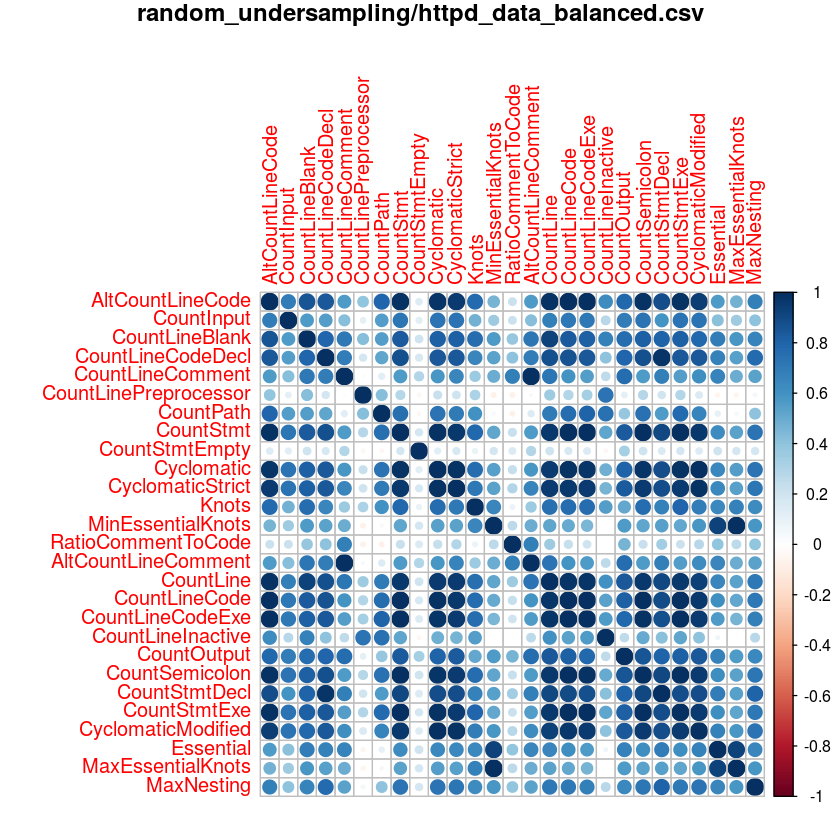

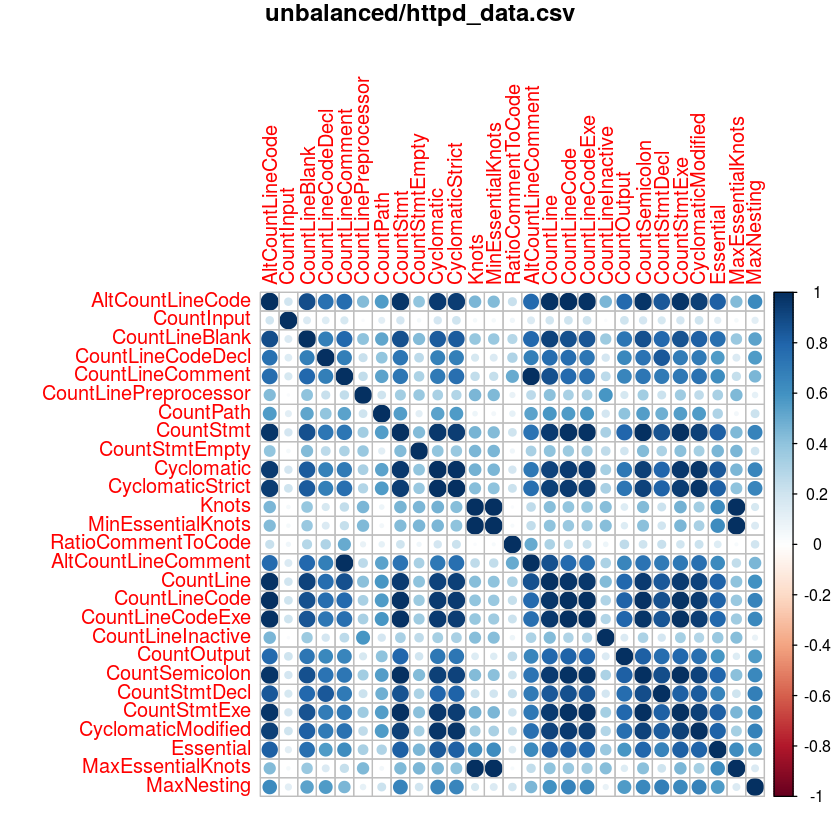

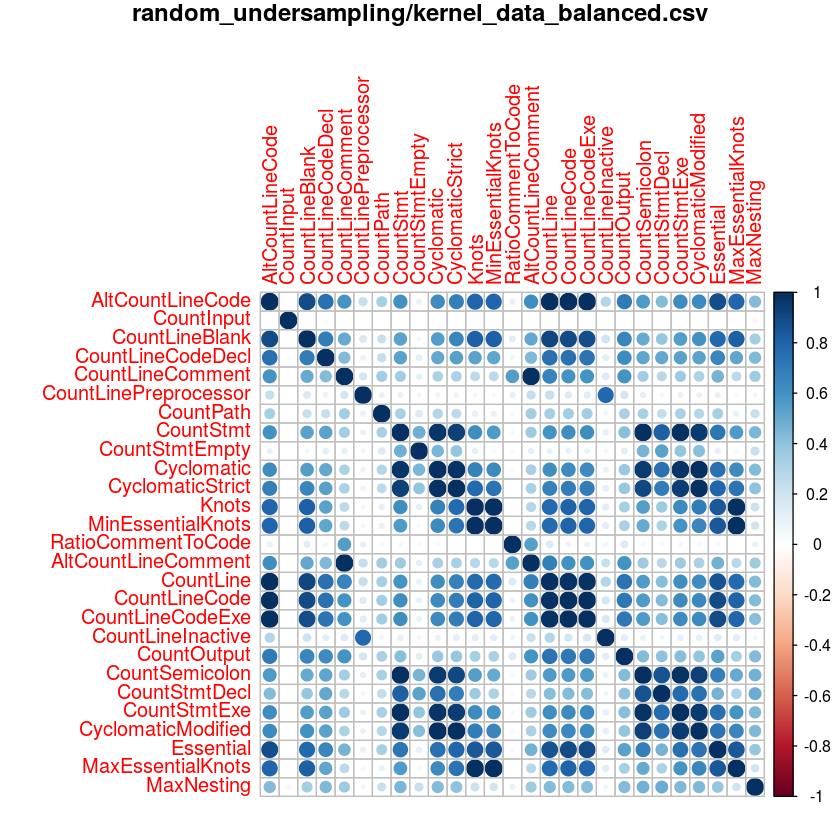

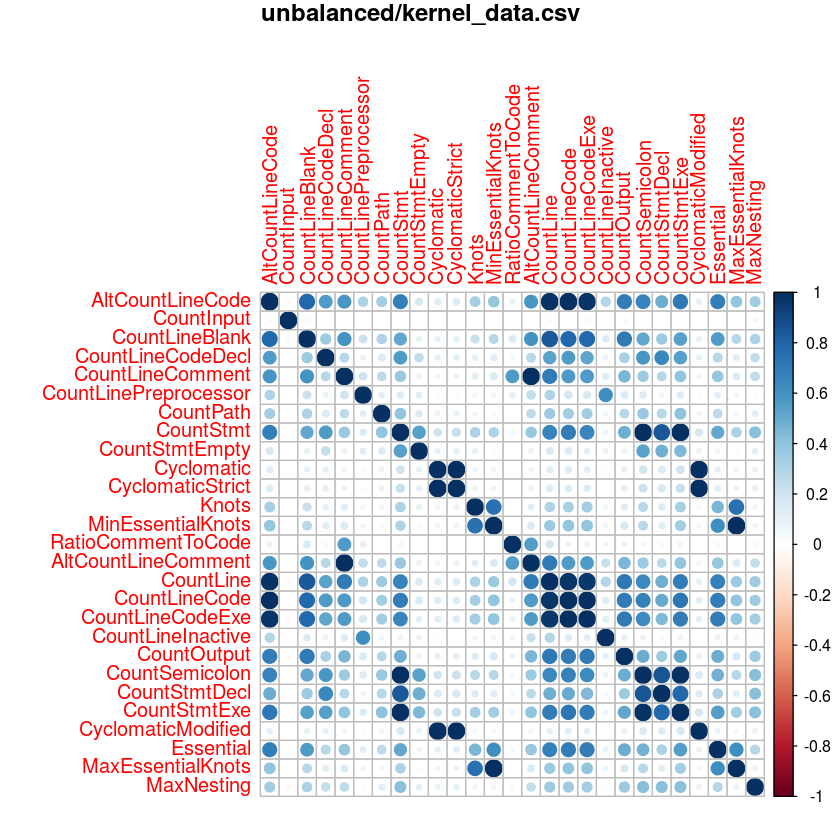

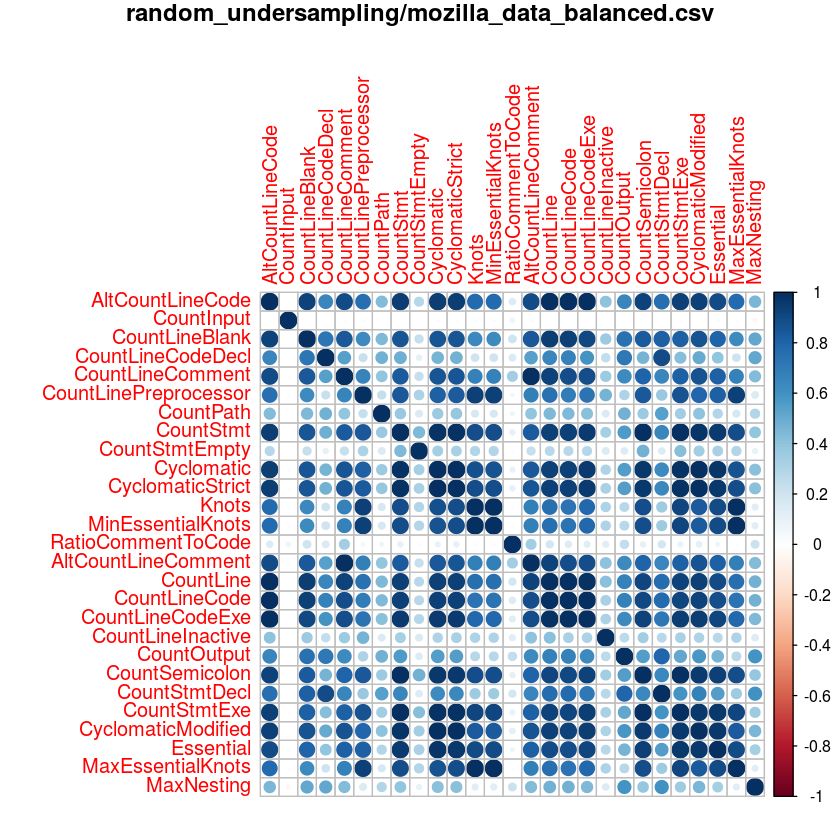

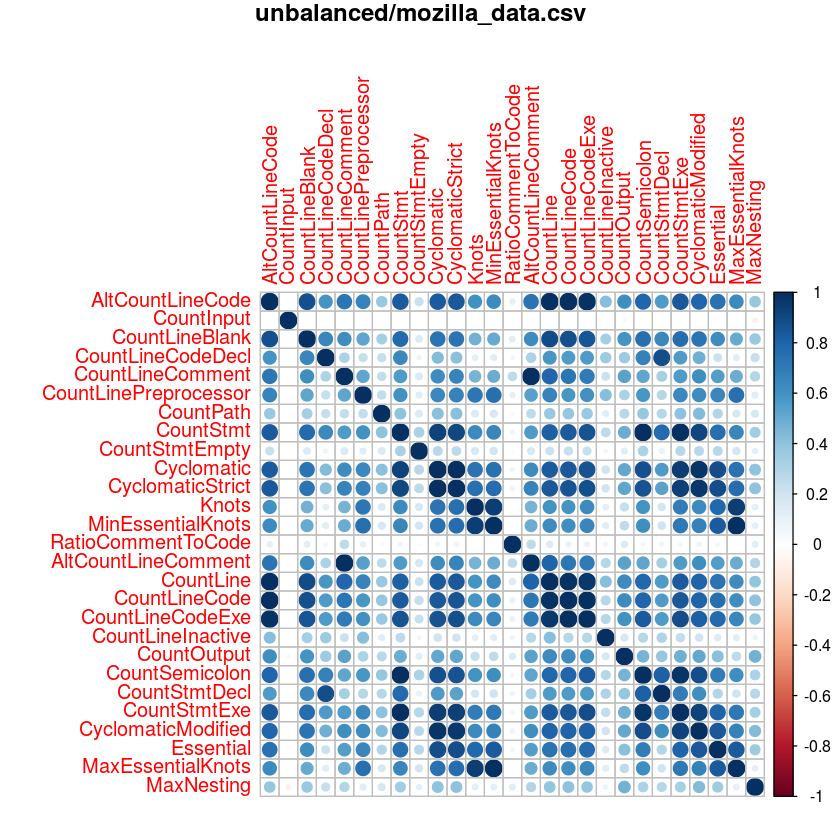

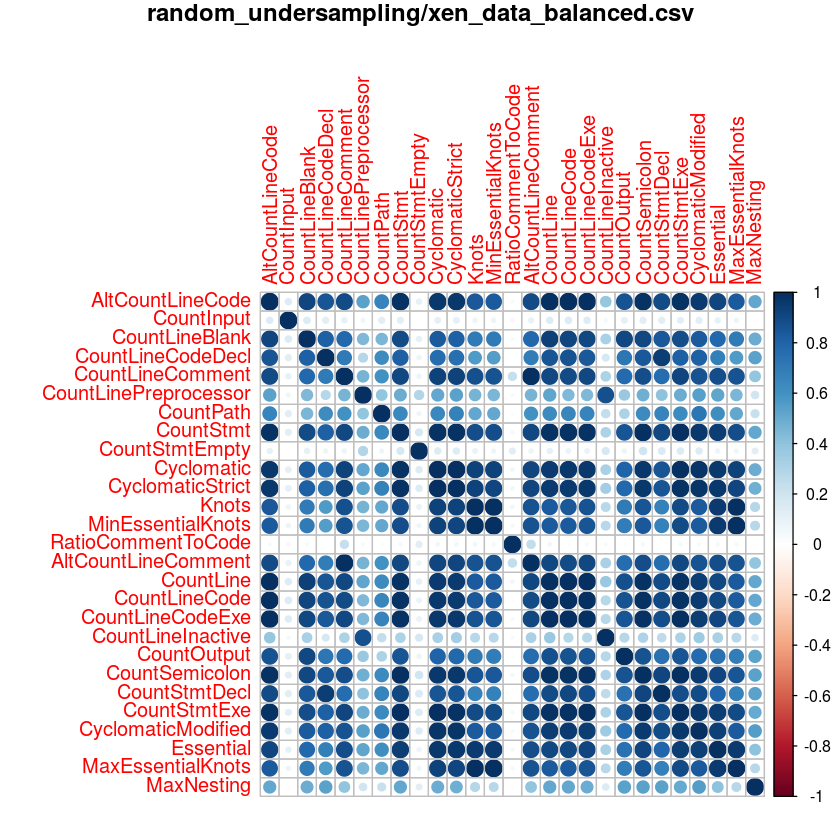

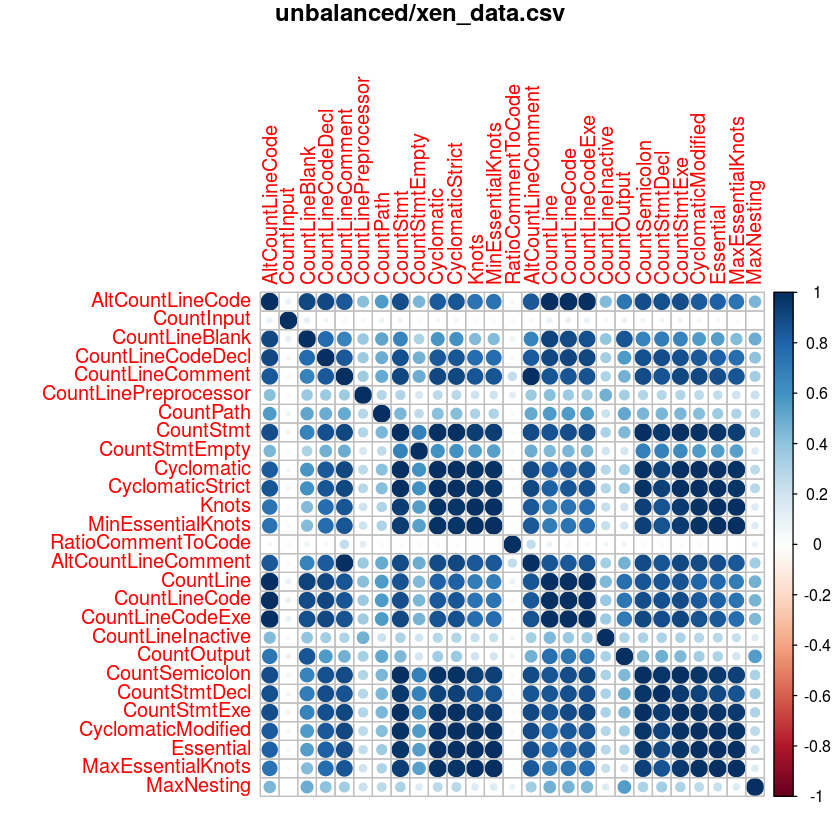

In [5]:
for(i in 1:5) {
    plot_correlations(data[[i]], files[i])
    plot_correlations(data[[i+5]], files[i+5])
}

In [6]:
# correlacoes mais significativas

alpha <- 0.01

correlation <- function(column1, column2) {
    res <- cor.test(column1, column2, conf.level = (1.0 - alpha))
    return (res)
    
}

corr_freq_gen <- c()

for(i in 1:10){
    dbase <- data[[i]]
    #print("--------------------------------")
    #print(files[i])
    #corr_names <- c()
    #corr_values <- c()
    
    for (j in 1:(ncol(dbase)-2)){
        for(k in j:(ncol(dbase)-2)){
            if (j != k) {
                res <- correlation(dbase[,j], dbase[,k])
                if (res['p.value'] <= alpha && res['estimate'] >= 0.95){
                    #corr_names <- append(corr_names, paste(colnames(dbase[j]), colnames(dbase[k]), sep = " x "))
                    #corr_values <- append(corr_values, res['estimate'][[1]])
                    corr_freq_gen <- append(corr_freq_gen, paste(colnames(dbase[j]), colnames(dbase[k]), sep = " x "))
                }
            }
        }
    }
    
    #par(mai=c(1,4,1,1))
    #barplot(height = corr_values, names.arg = corr_names, horiz=TRUE, las = 1)
    #str(corr_values)
    #str(corr_names)
    #break
}

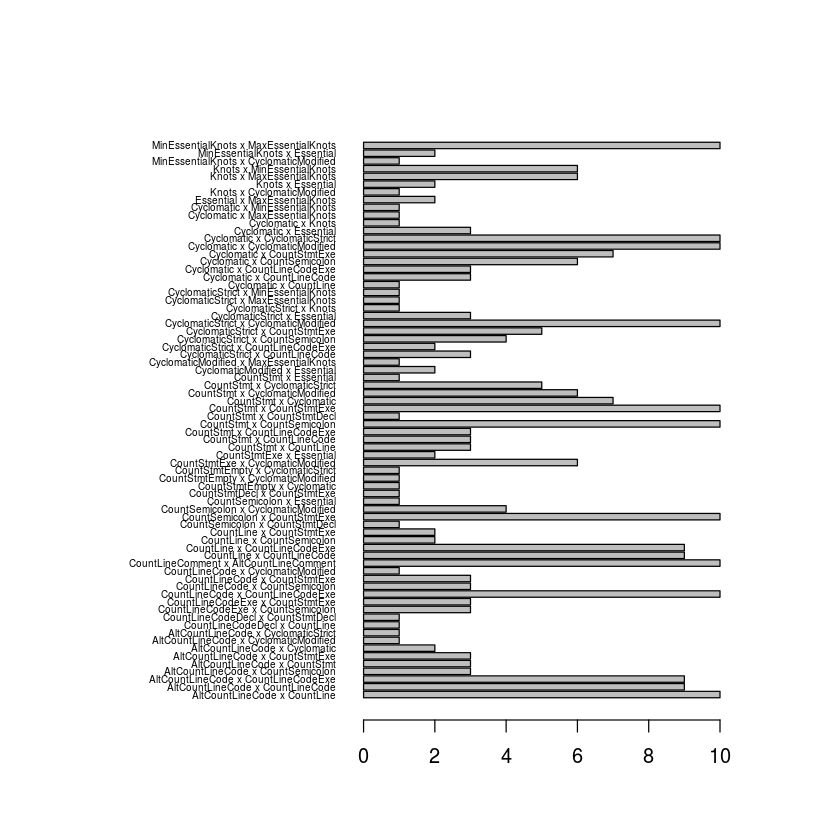

In [7]:
par(mai=c(1,3,1,1))
barplot(table(corr_freq_gen), horiz = TRUE, las = 1, cex.names = 0.5)

In [9]:
dt <- as.data.frame(table(corr_freq_gen))
dt[dt$Freq > 5,]

,corr_freq_gen,Freq
1,AltCountLineCode x CountLine,10
2,AltCountLineCode x CountLineCode,9
3,AltCountLineCode x CountLineCodeExe,9
14,CountLineCode x CountLineCodeExe,10
18,CountLineComment x AltCountLineComment,10
19,CountLine x CountLineCode,9
20,CountLine x CountLineCodeExe,9
24,CountSemicolon x CountStmtExe,10
31,CountStmtExe x CyclomaticModified,6
36,CountStmt x CountSemicolon,10
